In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory


# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-failure-prediction/heart.csv
/kaggle/input/titanic/titanic.csv


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#FFDD00;
           font-size:20px;
           font-family:Times New Roman;
           letter-spacing:0.5px">
        <p style="padding: 10px;
              color:Crimson;">
            <b>Types of Data</b>
        </p>
</div>

>There are different types of data in Statistics. The data are the individual pieces of factual information recorded, and it is used for the purpose of the analysis process. Data classification and data handling are important processes as it involves a multitude of tags and labels to define the data, its integrity and confidentiality.

<center><img src="https://2.bp.blogspot.com/-IUepWeQ3HDA/VO2LddsPkDI/AAAAAAAACNU/pyoF8xyaYsg/s1600/datatypes.png" alt="Heart Disease" width="50%" width="50%"></center>

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#FFDD00;
           font-size:20px;
           font-family:Nexa;
           letter-spacing:0.5px">
        <p style="padding: 10px;
              color:Crimson;">
            <b>Categorical variables</b>
        </p>
</div>

> A categorical variable has values that you can put into a countable number of distinct groups based on a characteristic. For a categorical variable, you can assign categories but the categories have no natural order.  If the variable has a natural order, it is an ordinal variable. Categorical variables are also called qualitative variables or attribute variables.

<center><img src="https://miro.medium.com/max/700/1*wYbTRM0dgnRzutwZq63xCg.png" alt="Heart Disease" width="50%" width="50%"></center>

> Most of the Machine learning algorithms cannot handle categorical variables unless we convert them to numerical values. Many algorithms’ performances vary based on how Categorical variables are encoded.

> Categorical variables can be divided into two categories: Nominal (No particular order) and Ordinal (some ordered).


**Few examples as below for the Nominal variable:**

- Red, Yellow, Pink, Blue
- Singapore, Japan, USA, India, Korea
- Cow, Dog, Cat, Snake

**Example of Ordinal variables:**

- High, Medium, Low
- “Strongly agree,” Agree, Neutral, Disagree, and “Strongly Disagree.”
- Excellent, Okay, Bad

<div style="display:fill;
            border-radius:15px;
            background-color:#FFDD00;
            font-size:150%;
            font-family:Times New Roman;
            letter-spacing:0.5px;
            padding:10px;
            color:Crimson;
            border-color: Crimson;
            text-align:justify;">
<b> There are many ways we can encode these categorical variables as numbers and use them in an algorithm. I will try to cover most of them, that are commonly used.</b>
</div>

<font color="Crimson"><h1 style="text-align: justify; font-family: 'Lucida Calligraphy'; font-size:30px; color:Crimson"> Introduction  </h1>

<font color="Crimson" size=+2 face="Lucida Calligraphy"><div style="text-align: justify">This notebook aims to:</font>
    
> **Implement and explain different methods used for categorical to numerical-encoding**

<font color="Crimson" size=+2 face="Lucida Calligraphy"><div style="text-align: justify">The different categorical encoding methods used in this project are:</font>

> 1.One hot encoding with Pandas (get_dummies)

> 2.One hot encoding with Sklearn (LabelEncoder)

> 3.One hot encoding with Sklearn (OneHotEncoder)

> 4.Ordinal Encoding

> 5.Replace Method

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
pd.set_option("display.precision", 2)

In [ ]:
heart = pd.read_csv('/content/drive/MyDrive/Dataset Files/heart (2).csv')
heart
#heart.head().style.set_properties(**{'background-color': 'Thistle',
                          # 'color': 'Red',
                           #'border-color': 'darkblack'})

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


 # Attributes:
    
- **Age:** Age of the patient [years]
    
- **Sex:** Sex of the patient [M: Male, F: Female]
    
- **ChestPainType:** Chest Pain Type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]

- **RestingBP:** Resting blood pressure [mm Hg]

- **Cholesterol:** Serum cholesterol [mm/dl]
    
- **FastingBS:** Fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
    
- **RestingECG**: Resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
    
- **MaxHR:** Maximum heart rate achieved [Numeric value between 60 and 202]
    
- **ExerciseAngina:** Exercise-induced angina [Y: Yes, N: No]
    
- **Oldpeak:** Oldpeak = ST [Numeric value measured in depression]
    
- **ST_Slope:** The slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
    
- **HeartDisease:** Output class [1: heart disease, 0: Normal]

In [ ]:
display(heart.shape)
display(heart.size)

(918, 12)

11016

In [ ]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
heart.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.00,918.00,918.00,918.00,918.00,918.00,918.00
mean,53.51,132.40,198.80,0.23,136.81,0.89,0.55
std,9.43,18.51,109.38,0.42,25.46,1.07,0.50
min,28.00,0.00,0.00,0.00,60.00,-2.60,0.00
25%,47.00,120.00,173.25,0.00,120.00,0.00,0.00
50%,54.00,130.00,223.00,0.00,138.00,0.60,1.00
75%,60.00,140.00,267.00,0.00,156.00,1.50,1.00
max,77.00,200.00,603.00,1.00,202.00,6.20,1.00


In [ ]:
heart.dtypes

,0
Age,int64
Sex,object
ChestPainType,object
RestingBP,int64
Cholesterol,int64
FastingBS,int64
RestingECG,object
MaxHR,int64
ExerciseAngina,object
Oldpeak,float64


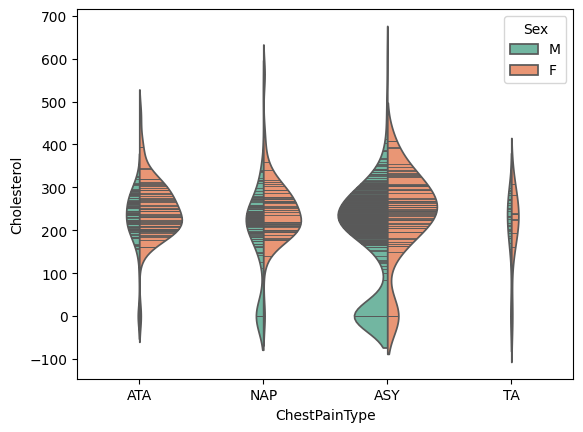

In [ ]:
#This command creates a violin plot and assigns the plot object to the variable ax. A violin plot is a method of plotting numeric data and can
#be understood as a combination of a box plot and a KDE (Kernel Density Estimate) plot. It shows the distribution of the data across different categories.

#The hue parameter adds another layer of grouping by color. The data is split based on the Sex variable, so you can compare the
#distribution of cholesterol levels for males and females within each type of chest pain.

#The palette parameter determines the color palette used for the different hues (i.e., the different sexes in this case). "Set2" is a
#predefined color palette in Seaborn that provides distinct, aesthetically pleasing colors.

#The split parameter, when set to True, splits the violin plot for each category (in this case, each type of chest pain) by the hue (sex).
#This means that within each category on the x-axis, there will be two halves of the violin plot, each representing the distribution of cholesterol levels for one sex.

#The scale parameter determines how the width of the violin plot is scaled. "count" scales the width of each violin plot according to
#the number of observations in that category. This means that categories with more data points will have wider plots.

#The inner parameter specifies the type of plot to draw inside the violin plot to show individual data points or a summary of the distribution.
#"stick" draws a small line (or "stick") for each individual observation within the distribution, giving a sense of the actual data points.

#The scale_hue parameter, when set to False, ensures that the width of the violin plots is scaled only by the scale parameter
#(in this case, by the count of observations) and not further adjusted for the hue variable. This means that the widths are consistent across sexes within each chest pain type.
ax = sns.violinplot(x="ChestPainType", y="Cholesterol", hue="Sex",data=heart, palette="Set2",
                    split=True,scale="count", inner="stick", scale_hue=False)

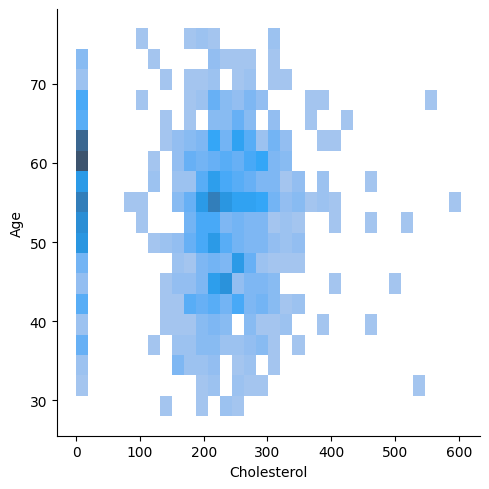

In [ ]:
#displot is a function in Seaborn used for creating distribution plots. It is a flexible tool that can generate histograms, kernel density plots (KDE),
#and other types of distribution visualizations.

#The kind parameter determines the type of plot to be created. "hist" stands for histogram, so this setting creates a 2D histogram that shows the joint distribution of Cholesterol and Age.
sns.displot(data=heart,x="Cholesterol",y="Age",kind="hist");

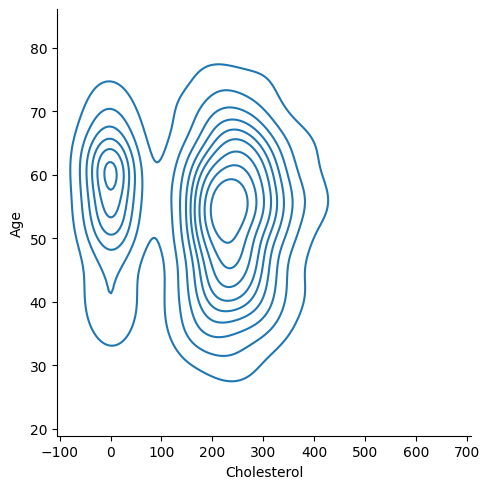

In [ ]:
#The kind parameter determines the type of plot to be created. "kde" stands for Kernel Density Estimate.
#A KDE plot provides a smoothed estimate of the probability density function of a continuous variable. In 2D, it shows the density of data points across two variables
#(in this case, Cholesterol and Age), helping to visualize the joint distribution of these variables.

sns.displot(data=heart,x="Cholesterol",y="Age",kind="kde");

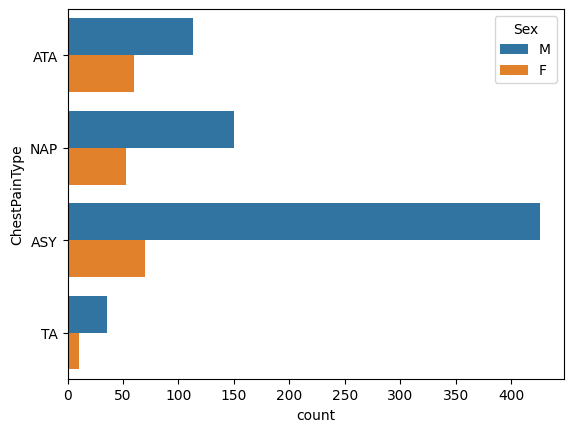

In [ ]:
sns.countplot(data=heart,  y='ChestPainType', hue='Sex' );

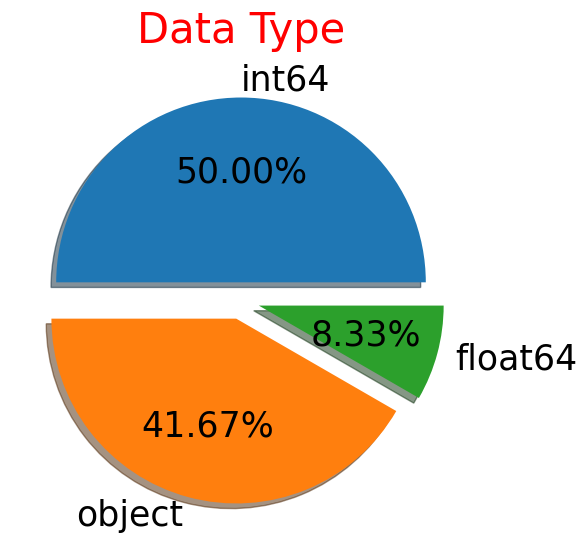

In [ ]:
import matplotlib
plt.figure(figsize=(6, 6))
matplotlib.rcParams.update({'font.size': 25})

heart.dtypes.value_counts().plot.pie(explode=[0.1, 0.1, 0.1],
                                       autopct='%1.2f%%',
                                       shadow=True)
plt.title('Data Type',color='Red',pad=20);
plt.axis('off');

In [ ]:
heart.isnull().mean()*100

,0
Age,0.0
Sex,0.0
ChestPainType,0.0
RestingBP,0.0
Cholesterol,0.0
FastingBS,0.0
RestingECG,0.0
MaxHR,0.0
ExerciseAngina,0.0
Oldpeak,0.0


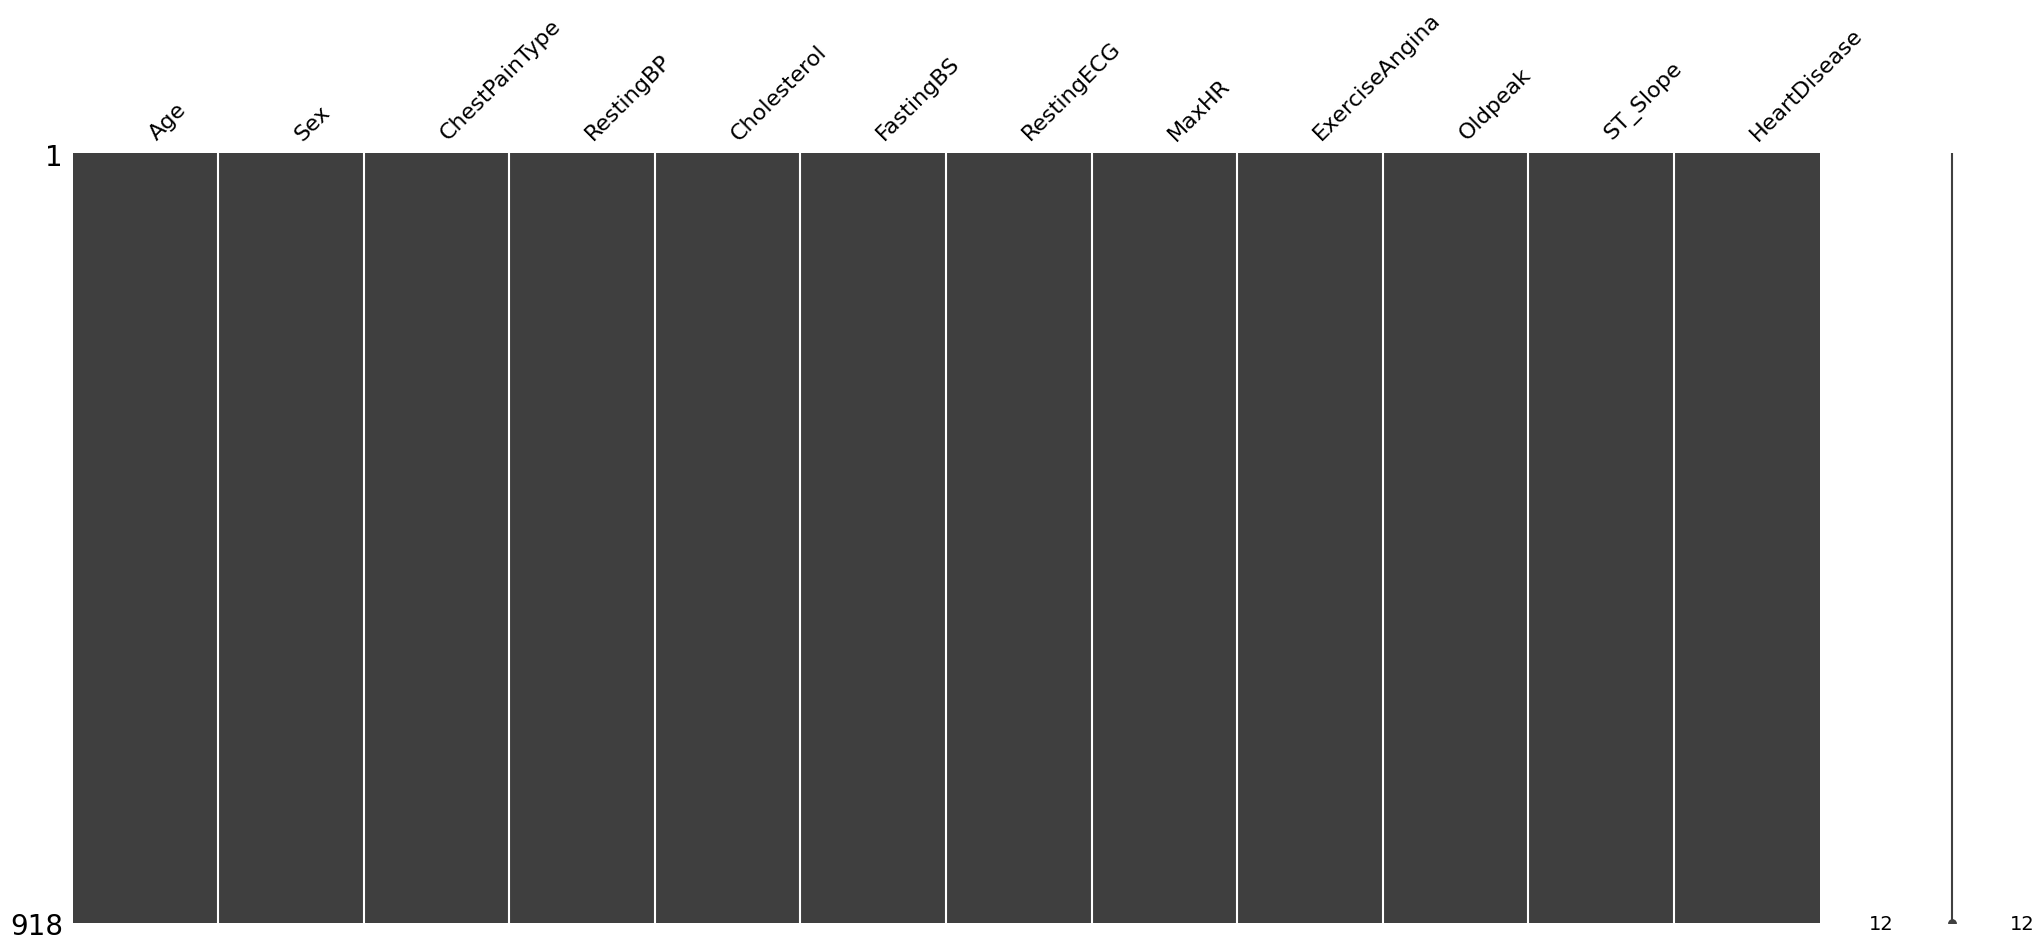

In [ ]:
import missingno as msno
msno.matrix(heart)
plt.show()

In [ ]:
print(f'We have {heart.shape[0]} instances with the {heart.shape[1]-1} features and 1 output variable')

We have 918 instances with the 11 features and 1 output variable


In [ ]:
corr=heart.corr() #["HeartDisease"]
plt.figure(figsize=(20, 15))
sns.heatmap(corr, vmax=.8, linewidths=0.01, square=True,annot=True,cmap='seismic',linecolor="black")
plt.title('Correlation between features')
plt.show()

ValueError: could not convert string to float: 'M'

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#FFDD00;
           font-size:20px;
           font-family:Times New Roman;
           letter-spacing:0.5px">
        <p style="padding: 10px;
              color:Crimson;">
            <b>What is encoding?</b>
        </p>
</div>

> Encoding is the technique we use to convert categorical entry in a dataset to a numerical data. Let say we have a dataset of employees in which there is a column that contains the information about the city location of an employee. Now we want to use this data to form a model which could predict the salary of an employee based upon his/her other details. Obviously, this model doesn’t understand anything about the city name. So how will you make the model know about it? For example, an employee who lives in a metropolitan city earns more than employees of a small city. Someway we need to make the model know about this . Yes, the way you are thinking in your mind is what we will do through code. As obvious we are thinking to rank the city based upon some spec . These ways of converting a categorical data to a numerical data are our target.

<font color="Crimson"><h2 style="text-align: justify; font-family: 'Lucida Calligraphy'; font-size:30px; color:Crimson"> One-Hot Encoding  </h2>

> One-Hot Encoding consists on generating a Boolean column for each category for a given qualitative variable.

**Limitation of One-Hot Encoding**

> One-hot encoding is a very popular transformation to the categorical variables. However, it increases the data dimensionality (The Curse of Dimensionality).
When the qualitative variables in the dataset have many modalities, the transformation via one-hot encoding will lead to a significant increase in size. This is not desirable especially when the original dataset is already large.

<center><img src="https://miro.medium.com/max/552/1*80tflY8LxDFRmkD16u25RQ.png" alt="Heart Disease" width="50%" width="50%"></center>

In [ ]:
heart['RestingECG'].value_counts()

,count
RestingECG,
Normal,552
LVH,188
ST,178


<font color="Crimson"><h2 style="text-align: justify; font-family: 'Lucida Calligraphy'; font-size:30px; color:Crimson"> One hot encoding with Pandas (get_dummies)  </h2>

The Python library Pandas provides a function called get_dummies to enable one-hot encoding.

In [ ]:
heart_1 = heart.copy()

In [ ]:
X = heart_1.drop(columns="HeartDisease" , axis=1)
Y = heart_1["HeartDisease"]

X["RestingECG"].value_counts()

,count
RestingECG,
Normal,552
LVH,188
ST,178


In [ ]:
X

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up


In [ ]:
#The get_dummies function will create new binary columns for each unique value in the RestingECG column.
#For example, if RestingECG has values "normal", "ST", and "hypertrophy", the function will create three new columns: RestingECG_normal, RestingECG_ST, and RestingECG_hypertrophy.
#Each of these new columns will have a binary value indicating the presence (1) or absence (0) of the respective category for each row.

X = pd.get_dummies(X, columns=["RestingECG"])
X.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,RestingECG_LVH,RestingECG_Normal,RestingECG_ST
0,40,M,ATA,140,289,0,172,N,0.0,Up,False,True,False
1,49,F,NAP,160,180,0,156,N,1.0,Flat,False,True,False
2,37,M,ATA,130,283,0,98,N,0.0,Up,False,False,True
3,48,F,ASY,138,214,0,108,Y,1.5,Flat,False,True,False
4,54,M,NAP,150,195,0,122,N,0.0,Up,False,True,False


In [ ]:
#By setting drop_first=True, the first category in each categorical column is dropped to avoid multicollinearity (when one column can be perfectly predicted from others)
#in models like linear regression.
#In the example of Color, if "Red" is the first category alphabetically, it would be dropped, leaving Color_Green and Color_Blue. The presence of "Red" can be inferred
#from the absence of both Color_Green and Color_Blue.

X = pd.get_dummies(X,drop_first=True)
X.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,False,True,False,True,True,False,False,False,False,True
1,49,160,180,0,156,1.0,False,True,False,False,False,True,False,False,True,False
2,37,130,283,0,98,0.0,False,False,True,True,True,False,False,False,False,True
3,48,138,214,0,108,1.5,False,True,False,False,False,False,False,True,True,False
4,54,150,195,0,122,0.0,False,True,False,True,False,True,False,False,False,True


<font color="Crimson"><h2 style="text-align: justify; font-family: 'Lucida Calligraphy'; font-size:30px; color:Crimson"> One hot encoding with Sklearn (LabelEncoder)  </h2>

> Label Encoding refers to converting the labels into a numeric form so as to convert them into the machine-readable form. Machine learning algorithms can then decide in a better way how those labels must be operated. It is an important pre-processing step for the structured dataset in supervised learning

> In this encoding, each category is assigned a value from 1 through N (where N is the number of categories for the feature. One major issue with this approach is there is no relation or order between these classes, but the algorithm might consider them as some order or some relationship. In below example it may look like (Cold<Hot<Very Hot<Warm….0 < 1 < 2 < 3 ) .Scikit-learn code for the data-frame as follows:

<center><img src="https://i.imgur.com/tEogUAr.png" alt="Heart Disease" width="100%" width="100%"></center>

In [ ]:
heart_2 = heart.copy()

In [ ]:
X = heart_2.drop(columns="HeartDisease" , axis=1)
Y = heart_2["HeartDisease"]

X["RestingECG"].value_counts()

,count
RestingECG,
Normal,552
LVH,188
ST,178


In [ ]:
#X['RestingECG'] is the column in the DataFrame X that contains categorical data which needs to be encoded.
#encoder.fit_transform(X['RestingECG']) performs two operations:
#Fit: It identifies the unique categories in the RestingECG column and assigns each category a unique integer value.
#Transform: It replaces each category in the RestingECG column with its corresponding integer value.
#The transformed values are then assigned back to X['RestingECG'], replacing the original categorical data with numerical labels.

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
X['RestingECG'] = encoder.fit_transform(X['RestingECG'])
X.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,M,ATA,140,289,0,1,172,N,0.0,Up
1,49,F,NAP,160,180,0,1,156,N,1.0,Flat
2,37,M,ATA,130,283,0,2,98,N,0.0,Up
3,48,F,ASY,138,214,0,1,108,Y,1.5,Flat
4,54,M,NAP,150,195,0,1,122,N,0.0,Up


In [ ]:
X["RestingECG"].value_counts()

,count
RestingECG,
1,552
0,188
2,178


In [ ]:
heart = pd.read_csv("/content/drive/MyDrive/Dataset Files/heart (2).csv")
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

#heart.columns.tolist() retrieves the list of all column names from the DataFrame heart and assigns it to categorical_features.
#In this context, it assumes that all columns in the DataFrame are categorical and need to be encoded. If some columns are not categorical, they should be excluded from this list.
categorical_features = heart.columns.tolist()
for col in categorical_features:
    heart[col] = encoder.fit_transform(heart[col])

heart.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,12,1,1,41,147,0,1,98,0,10,2,0
1,21,0,2,55,40,0,1,82,0,20,1,1
2,9,1,1,31,141,0,2,25,0,10,2,0
3,20,0,0,39,72,0,1,34,1,25,1,1
4,26,1,2,49,53,0,1,48,0,10,2,0


 <font color="Crimson"><h2 style="text-align: justify; font-family: 'Lucida Calligraphy'; font-size:30px; color:Crimson"> One hot encoding with Sklearn (OneHotEncoder)  </h2>

**One Hot Encoding using Sci-kit learn Library:**

> One hot encoding algorithm is an encoding system of Sci-kit learn library. One Hot Encoding is used to convert numerical categorical variables into binary vectors. Before implementing this algorithm. Make sure the categorical values must be label encoded as one hot encoding takes only numerical categorical values.

> One-hot encoding is used in machine learning as a method to quantify categorical data. In short, this method produces a vector with length equal to the number of categories in the data set.

<center><img src="https://miro.medium.com/max/1200/1*ggtP4a5YaRx6l09KQaYOnw.png" alt="Heart Disease" width="100%" width="100%"></center>

In [34]:
heart_3 = heart.copy()

In [35]:
X = heart_3.drop(columns="HeartDisease" , axis=1)
Y = heart_3["HeartDisease"]

X["RestingECG"].value_counts()

,count
RestingECG,
1,552
0,188
2,178


In [36]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(handle_unknown='ignore')

X = pd.DataFrame(ohe.fit_transform(X[['RestingECG']]).toarray())
X.head()

,0,1,2
0,0.0,1.0,0.0
1,0.0,1.0,0.0
2,0.0,0.0,1.0
3,0.0,1.0,0.0
4,0.0,1.0,0.0


In [37]:
X = pd.concat([heart_3,X],axis=1).drop('RestingECG',axis=1)
X.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,0,1,2
0,12,1,1,41,147,0,98,0,10,2,0,0.0,1.0,0.0
1,21,0,2,55,40,0,82,0,20,1,1,0.0,1.0,0.0
2,9,1,1,31,141,0,25,0,10,2,0,0.0,0.0,1.0
3,20,0,0,39,72,0,34,1,25,1,1,0.0,1.0,0.0
4,26,1,2,49,53,0,48,0,10,2,0,0.0,1.0,0.0



<font color="Crimson"><h2 style="text-align: justify; font-family: 'Lucida Calligraphy'; font-size:30px; color:Crimson"> Ordinal Encoding  </h2>

In [38]:
heart_4 = heart.copy()

In [39]:
X = heart_4.drop(columns="HeartDisease" , axis=1)
Y = heart_4["HeartDisease"]

X["RestingECG"].value_counts()

,count
RestingECG,
1,552
0,188
2,178


In [40]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()

#Fit: The encoder examines the unique categories present in each column of the DataFrame X and assigns a unique integer to each category. This integer assignment is done on a per-column basis.
#The fit method prepares the encoder with the necessary information to transform categorical values into ordinal integers. However, it does not perform the transformation yet.
enc.fit(X)

X.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,12,1,1,41,147,0,1,98,0,10,2
1,21,0,2,55,40,0,1,82,0,20,1
2,9,1,1,31,141,0,2,25,0,10,2
3,20,0,0,39,72,0,1,34,1,25,1
4,26,1,2,49,53,0,1,48,0,10,2


In [41]:
X["RestingECG"].value_counts()

,count
RestingECG,
1,552
0,188
2,178


# Replace

In [42]:
heart_5 = heart.copy()

In [43]:
X = heart_5.drop(columns="HeartDisease" , axis=1)
Y = heart_5["HeartDisease"]

X["RestingECG"].value_counts()

,count
RestingECG,
1,552
0,188
2,178


In [44]:
X["RestingECG"].replace({"Normal":0 ,"LVH":1 ,"ST":2} , inplace=True)

In [ ]:
X.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,12,1,1,41,147,0,1,98,0,10,2
1,21,0,2,55,40,0,1,82,0,20,1
2,9,1,1,31,141,0,2,25,0,10,2
3,20,0,0,39,72,0,1,34,1,25,1
4,26,1,2,49,53,0,1,48,0,10,2


In [45]:
X['RestingECG'].value_counts()

,count
RestingECG,
1,552
0,188
2,178


<font color="Crimson" size=+2 face="Lucida Calligraphy"><div style="text-align: justify">Model Building:</font>

In [46]:
X = heart_1.drop(columns="HeartDisease" , axis=1)
y = heart_1["HeartDisease"]

In [47]:
X = pd.get_dummies(X,drop_first=True)
X.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,True,True,False,False,True,False,False,False,True
1,49,160,180,0,156,1.0,False,False,True,False,True,False,False,True,False
2,37,130,283,0,98,0.0,True,True,False,False,False,True,False,False,True
3,48,138,214,0,108,1.5,False,False,False,False,True,False,True,True,False
4,54,150,195,0,122,0.0,True,False,True,False,True,False,False,False,True


In [48]:
#train_test_split is a function from scikit-learn used to split arrays or matrices into random train and test subsets.
#This is a common step in machine learning to evaluate the performance of a model on unseen data.

#X is the feature matrix (i.e., the input data), and y is the target vector (i.e., the output data or labels).
#train_test_split divides X and y into training and testing sets based on the specified parameters.

#X: The feature matrix containing the input features for your model.
#y: The target vector containing the labels or output values corresponding to the features in X.
#test_size=0.2:
#Specifies the proportion of the dataset to include in the test split. 0.2 means 20% of the data will be used for testing, and the remaining 80% will be used for training.
#You can also specify test_size as an integer to denote the absolute number of test samples.
#random_state=21:
#This is a seed value used by the random number generator for reproducibility. Setting random_state ensures that the split will be the same each time you run the code,
#allowing for consistent results across different runs.
#If you omit random_state, the split will be different each time you run the code, which may lead to variability in model performance.

#X_train: The feature matrix for the training set (80% of the data).
#X_test: The feature matrix for the test set (20% of the data).
#y_train: The target vector for the training set.
#y_test: The target vector for the test set.



from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=21)

In [ ]:
#accuracy_score: Calculates the accuracy of the predictions by comparing them with the true values.
#classification_report: Provides a detailed report of precision, recall, F1-score, and support for each class.
#confusion_matrix: Computes a confusion matrix to evaluate the performance of a classification algorithm.

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

#An instance of XGBClassifier named xgb is created. This classifier uses the XGBoost algorithm, which is an efficient implementation of gradient boosting.
import xgboost as Xgb
xgb = Xgb.XGBClassifier()

#The fit method trains the XGBClassifier on the training data (X_train and y_train).
xgb.fit(X_train,y_train)

#The predict method is used to make predictions on the test data (X_test)
y_pred_xgb = xgb.predict(X_test)

#The score method computes the accuracy of the model on the training data (X_train and y_train). This returns the proportion of correctly classified samples.
xgb.score(X_train, y_train)

#This calculates the accuracy of the model on the training set and converts it to a percentage rounded to two decimal places.
xgb_train = round(xgb.score(X_train, y_train) * 100, 2)

#accuracy_score(y_pred_xgb, y_test) calculates the accuracy of the predictions (y_pred_xgb) against the true test labels (y_test).
#The result is multiplied by 100 and rounded to two decimal places to get the test accuracy percentage.
xgb_accuracy = round(accuracy_score(y_pred_xgb, y_test) * 100, 2)

print("Training Accuracy    :",xgb_train ,"%")
print("Model Accuracy Score :",xgb_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_xgb))
print("\033[1m--------------------------------------------------------\033[0m")

Training Accuracy    : 100.0 %
Model Accuracy Score : 87.5 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.87      0.82      0.84        76
           1       0.88      0.92      0.90       108

    accuracy                           0.88       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.88      0.87       184

--------------------------------------------------------


<font color="Crimson" size=+2 face="Lucida Calligraphy"><div style="text-align: justify">Result prediction:</font>

In [ ]:
prediction = xgb.predict(X_test)
print(prediction)

[1 1 1 1 1 1 0 0 0 1 1 0 1 0 1 0 1 1 1 0 1 0 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1
 1 0 1 0 1 1 1 0 0 1 1 0 1 0 0 1 1 1 1 1 0 1 0 1 1 0 1 0 1 1 0 1 0 1 1 0 0
 0 0 1 1 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 0 1 1 1 0 1 1 0 0 0 1 1 1 1 0 0 0 0
 1 0 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0 0 0 1 1 0 1 0 1 1 0 0
 1 1 1 0 0 1 1 0 1 0 0 1 1 0 1 1 1 0 0 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 0]


In [ ]:
cross_checking = pd.DataFrame({'Actual' : y_test , 'Predicted' : prediction})
cross_checking.head(10).style.background_gradient(
        cmap='coolwarm').set_properties(**{
            'font-family': 'Lucida Calligraphy',
            'color': 'LigntGreen',
            'font-size': '15px'
        })

,Actual,Predicted
199,0,1
44,1,1
103,1,1
852,1,1
479,1,1
665,1,1
146,0,0
128,0,0
260,0,0
811,0,1


<font color="Crimson" size=+2 face="Lucida Calligraphy"><div style="text-align: justify">References</font>

https://slidecourse.blogspot.com/2021/06/numerical-vs-categorical-data.html

https://towardsdatascience.com/know-about-categorical-encoding-even-new-ones-c266227b9cbd

https://www.educative.io/blog/one-hot-encoding